# Exercises

After learning about the theory of UMAP in the lecture, we want to program parts of the algorithm for ourselves. We will start by calculating the $k$-nearest neighbors of each sample. For this we will look at the iris data set again.

## Load data

In [2]:
data("iris")

head(iris)

iris_data <- iris[, -5]
iris_species <- iris[, 5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## Scale data

A general theme in data science is to scale your data beforehand because usually algorithms work best if the features of the data provided to them are on the same order of magnitude. Therefore we will apply the standard scaling, also called z-score, for the iris data set.

The z-score is calculated like this:

$\Large \text{z-score} = \frac{x-x_{mean}}{x_{SD}}$

with $x_{mean}$ and $x_{SD}$ being the mean and the standard deviation of the data, respectively. Instead of calculating the z-score manually, we can use an in-built function `scale(x)` of R.

In [3]:
iris_data <- scale(iris_data)
head(iris_data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


## Distance matrix

Next we need to calculate the k-nearest neighbors of each of our samples. As a distance measure we use the euclidean distance as in the lecture. You can use for-loops or the built-in function `dist()`. Look up how to use `dist()` on the internet. Make sure that the end result is a matrix. You can check the format/class of an object with `str()`.

The upper left corner (5x5) of the distance matrix (150x150) should look something like this:

| |	1|	2|	3|	4|	5|
|--- |--- |---|---|---|---|
|1	|0.0000000	|1.1722914	|0.8427840	|1.0999999	|0.2592702|
|2	|1.1722914	|0.0000000	|0.5216255	|0.4325508	|1.3818560|
|3	|0.8427840	|0.5216255	|0.0000000	|0.2829432	|0.9882608|
|4	|1.0999999	|0.4325508	|0.2829432	|0.0000000	|1.2459861|
|5	|0.2592702	|1.3818560	|0.9882608	|1.2459861	|0.0000000|

In [3]:
### Try to code the distance matrix for the iris data set `iris_data`

calculate_distance <- function(data){
    #' @param data the iris data set 'iris_data'
    #' @returns a distance matrix, where first row shows the distance of the first sample to all the other samples. 
    #' second row shows the distance of the second sample to all the other samples. And so on.
    
    # here goes your code
    
    return(distance_matrix)
}


In [4]:
calculate_distance <- function(iris_data){
    #' @param data the iris data set 'iris_data'
    #' @returns a distance matrix
    
    dist <- as.matrix(dist(iris_data, method = "euclidean", diag = TRUE, upper = TRUE))
    
    return(dist)
}

dist <- calculate_distance(iris_data)
dist[1:5,1:5]

,1,2,3,4,5
1,0.0000000,1.1722914,0.8427840,1.0999999,0.2592702
2,1.1722914,0.0000000,0.5216255,0.4325508,1.3818560
3,0.8427840,0.5216255,0.0000000,0.2829432,0.9882608
4,1.0999999,0.4325508,0.2829432,0.0000000,1.2459861
5,0.2592702,1.3818560,0.9882608,1.2459861,0.0000000


We also need the distance to the next nearest neighbor $d_{\text{nearest neighbor}}$ for each sample. You can use the distance matrix from above and the `sort()` or `order()` function. The end result should be an array/vector of length 150 since we have that many samples.

The distance to the 5 next nearest neighbors of the first five samples should look something like this:

|	1|	2|	3|	4|	5|
|--- |---|---|---|---|
|0.1312|0.1656|0.1334|0.2363|0.1783|

In [5]:
### Try to code the next nearest neighbor for the iris data set `iris_data`

calculate_nearest_neighbor <- function(distance_matrix){
    #' @param distance_matrix the distance matrix from above
    #' @returns a vector of the next nearest neighbor for each sample

    # here goes your code

    return(nearest_neighbors)

}



In [5]:
calculate_nearest_neighbor <- function(distance_matrix){
    #' @param distance_matrix the distance matrix from above
    #' @returns a vector of the next nearest neighbor for each sample
    
    nearest_neighbors <- apply(distance_matrix, 2, sort)[2,,drop=FALSE]

    return(nearest_neighbors)

}

dist_nn <- calculate_nearest_neighbor(dist)
dist_nn[1:5]


[1] 0.1311927 0.1655887 0.1333894 0.2363181 0.1783123

## High dimensional edge weights

Now we can calculate the high dimensional edge weights $w_{high}(x_i, x_j)$. As mentioned in the lecture we will not solve the following equation analytically for $\sigma_i$ but use a binary search.

\begin{equation}
    \Large \sum_{j=1, j\ne i}^{k} \exp(-\frac{d(x_i, x_j)-d_{\text{nearest neighbor}}}{\sigma_i}) = log_2(k)
    \tag{1}
\end{equation}

Instead of calculating the sum of the high dimensional edge weights, we first calculate the high dimensional edge weights for a specific sample (and do not take the sum).

Different from above equation we will use $k = \text{total number of samples}$ (150 in our case), instead of $k$-nearest neighbors. This saves us some computational power by not sorting for the $k$-nearest neighbors for every sample (and later makes taking the "fuzzy union" of two edges easier). Therefore we will return all the high dimensional edge weights for a specific sample and not just its $k$-nearest neighbors high dimensional edge weights.

Choosing a $\sigma$=3 we expect the first 5 biggest high dimensional edge weights (after sorting them) for the first sample to look something like this.

|	1|	2|	3|	4|	5|
|--- |---|---|---|---|
|1.0000|0.9993|0.9815|0.9656|0.9582|

In [16]:
high_dim_edge_weight <- function(dist, sample_index, dist_nn, sigma){
    #' @param dist distance matrix
    #' @param sample_index integer of sample, for which we want to 
    #'                     calculate the edge weights of its neighbors
    #' @param dist_nn nearest neighbors
    #' @param sigma decaying constant
    #' @returns the high dimensional edge weights as an array for a specific sample. 
    #'          This should be 150 long vector

    # here goes your code

    return(high_dim_edges)
}

In [17]:
high_dim_edge_weight <- function(dist, sample_index, dist_nn, sigma){
    #' @param dist distance matrix
    #' @param sample_index integer of sample, for which we want to 
    #'                     calculate the edge weights of its neighbors
    #' @param dist_nn nearest neighbors
    #' @param sigma decaying constant
    #' @returns the high dimensional edge weights as an array for a specific sample. 
    #'          This should be 150 long vector

    d <- dist[,sample_index] - dist_nn[sample_index]
    d[d < 0] <- 1e10 #this sets the edge weight from the sample to itself to 0

    high_dim_edges <- exp(-d/sigma)
    high_dim_edges <- unname(high_dim_edges)

    return(high_dim_edges)
}

# we calculate the edge weights for the first sample (sample_index=1)
high_dim_edges_1st_sample <- high_dim_edge_weight(dist, sample_index=1, dist_nn, sigma=3)

# and check if that agrees with the table above. the 5 highest edge weights are
first_five <- sort(high_dim_edges_1st_sample, decreasing = TRUE)[1:5]
first_five

[1] 1.0000000 0.9992680 0.9815387 0.9655651 0.9582060

## Binary search for sigma

For the binary search we need to calculate the $k$-nearest neighbors as a function of the high dimensional edge weights or more specifically the $\sigma_i$ sigma. Different high dimensional edge weights (or $\sigma_i$) for a sample $i$ result in a different $k$. 

Find the mathematical expression that describes $k$ as a function of the high dimensional edge weights. For this you need to rewrite equation 1 and singulate the $k$.


In [11]:
k <- function(high_dim_edge_weights){
    #' @param high_dim_edge_weights the high dimensional edge weights of a sample 
    #' @returns the expected number of k-nearest neighbors given 
    #'          edge weights (or more specifically sigma).
    
    # here goes your code

    return(summation)
}

In [19]:
k <- function(high_dim_edge_weights){
    #' @param high_dim_edge_weights the high dimensional edge weights of a sample
    #' @returns the expected number of k-nearest neighbors given 
    #'          edge weights (or more specifically sigma).
     
    summation <- 2**sum(high_dim_edge_weights)
    return(summation)
}

Before writing the binary search function, convince yourself that changing $\sigma_i$ in the high dimensional edge weight function `high_dim_edge_weight()` and plugging the result into the function `k()`, will return a different result of k each time and therefore playing around with $\sigma_i$ will eventually find the correct and expected number of $k$-nearest neighbors.

In [13]:
# Plug the result of "high_dim_edge_weight()" into "k()" and 
# find the correct sigma for the first sample manually by playing around with the sigma value.

# here goes your code

In [25]:
k_nn = 15 # k-nearest neighbors = 15 is our goal

k_approx <- k(high_dim_edge_weight(dist, sample_index=1, dist_nn, sigma=0.2))
k_approx # too large
k_approx <- k(high_dim_edge_weight(dist, sample_index=1, dist_nn, sigma=0.05))
k_approx # too small
k_approx <- k(high_dim_edge_weight(dist, sample_index=1, dist_nn, sigma=0.09))
k_approx # close enough to our goal of k_nn = 15


[1] 205.675

[1] 6.289711

[1] 14.47338

We can actually write k as a function of sigma $\sigma_i$ like this:

In [35]:
k_of_sigma <- function(sigma){
    return (k(high_dim_edge_weight(dist, sample_index=1, dist_nn, sigma)))
}

k_of_sigma(0.09)

[1] 14.47338

Now we write the binary search function. Depending on your programming experience writing the binary search algorithm completely alone can be quite difficult. Feel free to google the binary search algorithm. Take care that you have a stopping criteria, i.e. a condition that stops your function past a numerically sufficient point of precision.

For the first sample we expect a $\sigma_i$ = 0.09 with $k$-nearest neighbors k_nn = 15.

In [15]:
sigma_binary_search <- function(k_of_sigma, fixed_k){
    #' @param k_of_sigma k as a function of sigma
    #' @param fixed_k our binary search goal. k_of_sigma should approximate this fixed_k at the end.

    # here goes your code 
    
    return(approx_sigma)
}

In [39]:
sigma_binary_search <- function(k_of_sigma, fixed_k){
    #' @param k_of_sigma k as a function of sigma
    #' @param fixed_k our binary search goal. k_of_sigma should approximate fixed_k at the end.

    sigma_lower_limit <- 0; sigma_upper_limit=1000
    for (i in 1:20){
        approx_sigma <- (sigma_lower_limit + sigma_upper_limit) / 2
        if (k_of_sigma(approx_sigma) < fixed_k){
            sigma_lower_limit <- approx_sigma
        }
        else{
            sigma_upper_limit <- approx_sigma
        }
        if (abs(fixed_k - k_of_sigma(approx_sigma)) <= 1e-10){
            break
        }
    }
    return(approx_sigma)
}

k_nn=15
sigma_approx <- sigma_binary_search(k_of_sigma, k_nn)
sigma_approx

[1] 0.09250641

Now we do the same for the rest of the samples (not just the first one) and save the $\sigma_i$ values in a vector.

The first five $\sigma_i$ values of the first five samples should be something like:

|	1|	2|	3|	4|	5|
|--- |---|---|---|---|
|0.0925|0.0887|0.1383|0.0639|0.1249|

We will also populate a 150x150 matrix with all the high dimensional edge weights. For each sample all the high dimensional edge weights go into one column.

In [43]:
k_nn <- 15
n <- dim(iris_data)[1]
high_dim_edge_weight_matrix <- matrix(0, nrow=n, ncol=n)
sigma_vec <- rep(0, n)

for (sample_index in 1:n){

    binary_search_result <- sigma_binary_search(function(sigma) k(high_dim_edge_weight(dist, sample_index, dist_nn, sigma)), k_nn)
    
    high_dim_edge_weight_matrix[,sample_index] <- high_dim_edge_weight(dist, sample_index, dist_nn, binary_search_result)
    sigma_vec[sample_index] <- binary_search_result
    if (sample_index %% 50 == 0){
        cat(paste0("binary search progress: processed sample ", sample_index ," out of ", n, "\n"))
    }
}

high_dim_edge_weight_matrix[1:5, 1:5]
sigma_vec[1:5]

binary search progress: processed sample 50 out of 150
binary search progress: processed sample 100 out of 150
binary search progress: processed sample 150 out of 150


0.000000e+00,1.176261e-05,0.005916391,1.347909e-06,5.230809e-01
1.295095e-05,0.000000e+00,0.060352539,4.636926e-02,6.548819e-05
4.563063e-04,1.805524e-02,0.000000000,4.820527e-01,1.528988e-03
2.829385e-05,4.929161e-02,0.339083993,0.000000e+00,1.943044e-04
2.504424e-01,1.107476e-06,0.002066182,1.372178e-07,0.000000e+00


[1] 0.09250641 0.08869171 0.13828278 0.06389618 0.12493134

## Averaging/fuzzy union

Write the fuzzy union operator "to average" two different high dimensional edge weights, e.g. like in the lecture $w_{high}(B,C)$ and $w_{high}(C,B)$.

The formula was given by:

$\text{fuzzy union}(x,y) = x + y - x*y$

where $x$ and $y$ are the different edge weights.

In [18]:
# Write the fuzzy union operator for the high dimensional edge weights "high_dim_edge_weight_matrix" from above.
# Try to make use of matrix operations like transposing and multiplication instead of using loops. 
# Take care however to use elementwise multiplication and not matrix multiplication.

# here goes your code


In [103]:
high_dim_edge_avg <- high_dim_edge_weight_matrix + t(high_dim_edge_weight_matrix) - (high_dim_edge_weight_matrix * t(high_dim_edge_weight_matrix)) #elementwise multiplication not vector product!
high_dim_edge_avg[1:5,1:5]

0.000000e+00,2.471341e-05,0.006369997,2.964172e-05,6.425217e-01
2.471341e-05,0.000000e+00,0.077318097,9.337526e-02,6.659559e-05
6.369997e-03,7.731810e-02,0.000000000,6.576803e-01,3.592011e-03
2.964172e-05,9.337526e-02,0.657680317,0.000000e+00,1.944416e-04
6.425217e-01,6.659559e-05,0.003592011,1.944416e-04,0.000000e+00


## Low dim. Weight

Write the low dimensional weight function `low_dim_weight()`. The formula was given in the lecture as:

\begin{equation}
    \Large w_{low}(y_i,y_j) = (1 + a(|y_i - y_j|)^{2b})^{-1}
    \tag{2}
\end{equation}

with $a = 1.93$ and $b=0.79$.

For `y <- c(1:5)` the `low_dim_weight()` should return for the first sample:

|	1|	2|	3|	4|	5|
|--- |---|---|---|---|
|1.0000	|0.3413	|0.1477	|0.0837	|0.0548|


In [20]:
low_dim_weight <- function(y, a=1.93, b=0.79){
    #' @param y low dimension weights vector
    #' @param a parameter constant
    #' @param b parameter constant
    #' @returns low dimensional weights as a nxn matrix, where n is the total number of samples.

    # here goes your code

    return(low_dim_weight_matrix)
}

In [65]:
low_dim_weight <- function(y, a=1.93, b=0.79){
    #' @param y low dimension weights vector
    #' @param a parameter constant
    #' @param b parameter constant
    #' @returns low dimensional weights as a nxn matrix, where n is the total number of samples.
    
    low_dim_dist <- as.matrix(dist(y, method = "euclidean", diag = TRUE, upper = TRUE))
    #low_dim_weight_matrix <- (1 + a * low_dim_dist**(2*b))**(-1)
    low_dim_weight_matrix <- (1 + a * low_dim_dist**(2*b))**(-1)

    return(low_dim_weight_matrix)
}

y <- c(1:5)
low_dim_weight(y)

,1,2,3,4,5
1,1.00000000,0.34129693,0.1477079,0.08368293,0.05479178
2,0.34129693,1.00000000,0.3412969,0.14770791,0.08368293
3,0.14770791,0.34129693,1.0000000,0.34129693,0.14770791
4,0.08368293,0.14770791,0.3412969,1.00000000,0.34129693
5,0.05479178,0.08368293,0.1477079,0.34129693,1.00000000


## Spectral embedding

The low dimensional embedding can be generated in python with a few commands, whereas in R it is more complicated. Therefore when using the iris data set we will simply load the result of the python script, which looks like this:

> \# python code \
> import numpy as np \
> from sklearn.manifold import SpectralEmbedding
> 
> model = SpectralEmbedding(n_components = 2, n_neighbors = 15) \
> y = model.fit_transform(iris_data) \
>
> np.savetxt("./python_y_embedding_n_neigh=15.txt", y)

In R we can then load and plot it, i.e.

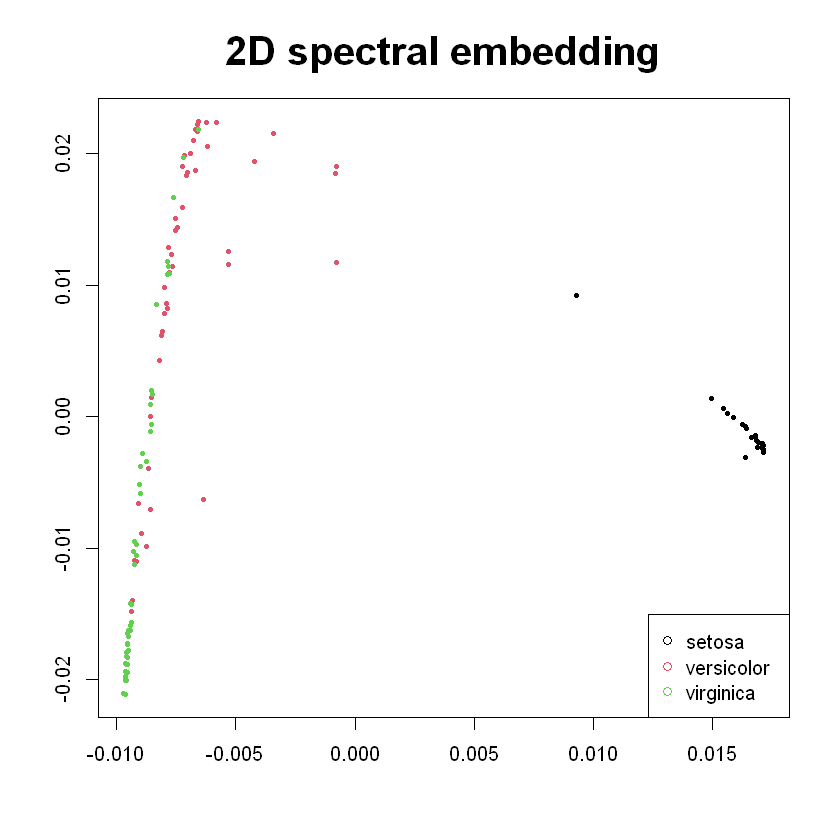

In [71]:
y <- read.csv("../data/python_y_embedding_n_neigh=15.txt", header=FALSE)
y <- as.matrix(y)

plot(y[,1], y[,2], pch=19, col=factor(iris_species), main="2D spectral embedding", xlab="", ylab="", cex=0.5, cex.main=2)
legend("bottomright", legend=levels(iris_species), pch=1, col=1:3)

But we can also just use a random initalization if we want to, i.e.

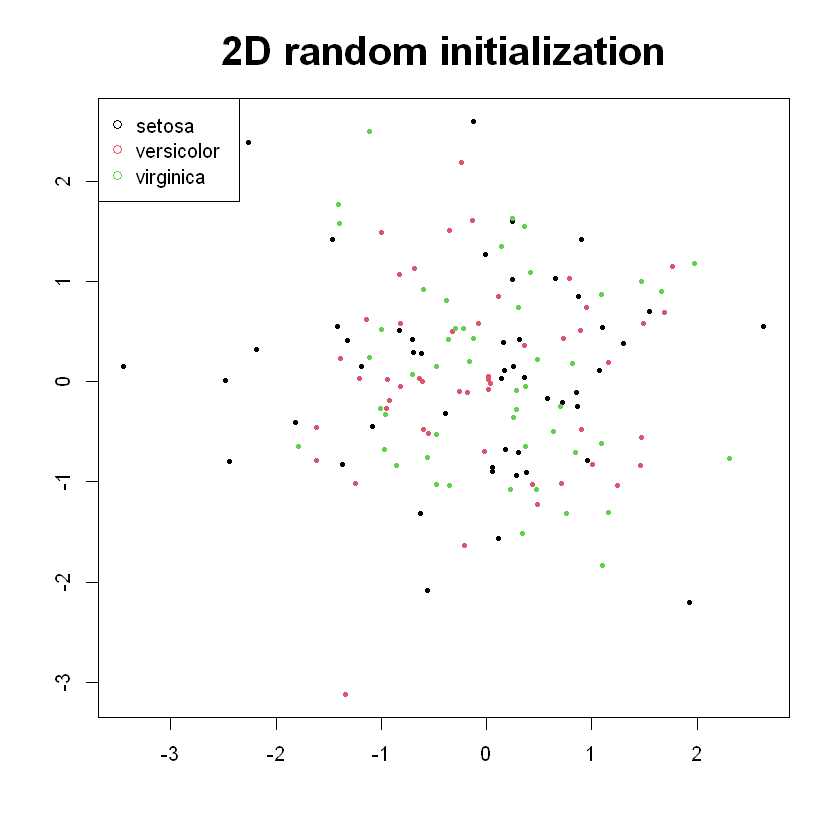

In [69]:
y_random <- matrix(rnorm(300), ncol=2)

plot(y_random[,1], y_random[,2], pch=19, col=factor(iris_species), main="2D random initialization", xlab="", ylab="", cex=0.5, cex.main=2)
legend("topleft", legend=levels(iris_species), pch=1, col=1:3)

## Cost function

Now we write the cost function. As discussed in the lecture the cost function is given by:

$\Large CE(w_{high}(x_i, x_j), w_{low}(y_i, y_j)) = \\
\sum_i \sum_j [ w_{high}(X) \log(\frac{w_{high}(X)}{w_{low}(Y)}) + (1- w_{high}(X)) \log(\frac{1-w_{high}(X)}{1-w_{low}(Y)})] $

where $X$ stands for the distance between two points in high dimensional space and $Y$ stands for the distance in low dimensional space. Remember that later we will take the derivative of the cost function and therefore we can leave out the parts that only depend on $w_{high}(X)$ (because they are constant):

$\Large CE(w_{high}(x_i, x_j), w_{low}(y_i, y_j)) = \\
\sum_i \sum_j [-w_{high}(X) \log(w_{low}(Y)) + (1- w_{high}(X)) \log(1-w_{low}(Y))]$


The low dimensional weights can be obtained from the low dimensional distances $y$ from the function `low_dim_weight(y)`. Try to use matrix vectorization again instead of for-loops since it is a lot faster.

For `y <- c(1:150)` the total cost function should be something like this: 

$\text{cost function} = 4254$

Take care however to use the averaged high dimensional edge weights (fuzzy union) when comparing the results.

In [23]:
cost_function <- function(y, edge_weight_high){
    #' @param y the low dimensional weights vector
    #' @param edge_weight_high the high dimensional edge weights vector
    #' @returns a cost function value, that represents how well the high dimensional structure 
    #'          is currently represented by the low dimensional structure. the lower the better.

    # here goes your code

    return(cost_function_total)
}


In [104]:
cost_function <- function(y, edge_weight_high){
    #' @param y the low dimensional weights vector
    #' @param edge_weight_high the high dimensional edge weights vector
    #' @returns a cost function value, that represents how well the high dimensional structure is currently
    #' represented by the low dimensional structure. the lower the better.

    edge_weight_low <- low_dim_weight(y)
    cost_function_matrix <- -edge_weight_high * log(edge_weight_low + 0.01) - (1 - edge_weight_high) * log(1 - edge_weight_low + 0.01)

    return(sum(cost_function_matrix))
}

y <- c(1:150)
cost_function(y, high_dim_edge_avg)

[1] 4254.109

## Gradient of cost function

Next we need the derivative of the cost function. The equation of the cost function from the lecture is as follows:

\begin{aligned}

\large \frac{\partial CE(w_{low}(d_{ij}))}{\partial y_i} &= \text{ ... } = \\ 

\Large &= \sum_j \Biggr[ \frac{2abd_{ij}^{2(b-1)}w_{high}}{1 + ad_{ij}^{2b}} - \frac{2b (1-w_{high})}{d_{ij}^2(1 + ad_{ij}^{2b})} \Biggr] (y_i - y_j)

\end{aligned}

Below there are two implementation of the gradient of the cost function in R. The first one is fully vectorized and therefore harder to understand than the slightly less vectorized version below it. 

In both versions part of the prefactor (right_prefactor) was normalized. This is not part of the original UMAP algorithm, however including the normalization shows better performance on this manually programmed version of the UMAP algorithm.

In [76]:
#half vectorized version
cost_gradient <- function(y, high_dim_edge_avg, a=1.93, b=0.79){
    #' @param y the low dimensional weights vector
    #' @param edge_weight_high_avg the "average" of the high dimensional edge weights vector
    #' @returns the gradient of the cost function, i.e. in our case a matrix of shape 150x2
    
    n_ <- dim(y)[1] # n_ equals how many points/samples do we have in our data?
    m_ <- dim(y)[2] # m_ equals the low dimensional space we project into? usually 2d or 3d.
    y_i <- matrix(NaN, nrow=n_, ncol=m_)

    d_ij <- as.matrix(dist(y, method = "euclidean", diag = TRUE, upper=TRUE))
    left_prefactor <- a * high_dim_edge_avg * (c(1e-8) + d_ij**2)**(b-1)
    right_prefactor <- (1 - high_dim_edge_avg) %*% (c(0.001) + d_ij**2)**(-1)
    
    diag(right_prefactor) <- 0
    right_prefactor <- right_prefactor / rowSums(right_prefactor)
    
    prefactor <- 2 * b * low_dim_weight(y) * (left_prefactor - right_prefactor)

    for (i in 1:n_){ # for loop over all points i

        point_i <- y[i, ]
        y_diff<- matrix(NaN, nrow=n_, ncol=m_)
        for (j in 1:n_){ # for loop over all points j (in respect to point i)
            point_j <- y[j, ]
            y_diff[j, ] <- point_i - point_j
        }
        y_i[i, ] <- colSums(prefactor[i, ] * y_diff)

    }
    return(y_i)
}

y <- read.csv("../data/python_y_embedding_n_neigh=15.txt", header=FALSE)
y <- as.matrix(y)

cost_gradient(y, high_dim_edge_avg)[1:5,]


0.024556022,-0.064312169
-0.002233739,-0.022882894
0.020781013,-0.065584653
-0.033270805,0.007680316
-0.001407369,-0.017918261


In [77]:
#fully vectorized version
cost_gradient <- function(y, high_dim_edge_avg, a=1.93, b=0.79){
    #' @param y the low dimensional weights vector
    #' @param edge_weight_high_avg the "average" of the high dimensional edge weights vector
    #' @returns the gradient of the cost function, i.e. in our case a matrix of shape 150x2
        
    d_ij <- as.matrix(dist(y, method = "euclidean", diag = TRUE))
    left_prefactor <- a * high_dim_edge_avg * (c(1e-8) + d_ij**2)**(b-1)
    right_prefactor <- (1 - high_dim_edge_avg) %*% (c(0.001) + d_ij**2)**(-1)

    diag(right_prefactor) <- 0
    right_prefactor <- right_prefactor / rowSums(right_prefactor)

    prefactor <- 2 * b * low_dim_weight(y) * (left_prefactor - right_prefactor)

    dim(prefactor) <- c(dim(prefactor)[1], dim(prefactor)[-1], 1)

    y_i <- array(rep(t(y), each=dim(y)[1]), c(dim(y)[1], dim(y)[-1], dim(y)[1]))
    y_j <- array(y , c(dim(y)[1], dim(y)[-1], 1))
    y_diff <- sweep(y_i, 1, y_j, "-", check.margin = FALSE)

    result <- sweep(y_diff, 3, prefactor, "*", check.margin = FALSE)

    return(t(colSums(result, dims=1)))
}

y <- read.csv("../data/python_y_embedding_n_neigh=15.txt", header=FALSE)
y <- as.matrix(y)

cost_gradient(y, high_dim_edge_avg)[1:5,]

0.024556022,-0.064312169
-0.002233739,-0.022882894
0.020781013,-0.065584653
-0.033270805,0.007680316
-0.001407369,-0.017918261


## Convergence

Now we put everything together. We start with either a random initalization or the spectral embedding of the low dimensional representation of our data. Then we calculate the gradient of the cost function and take a step in the correct direction in the low dimensional space, i.e.

$\Large y_i = y_i - \alpha \cdot \frac{\partial CE}{\partial y_i}$

where $\alpha$ is the learning rate and $\frac{\partial CE}{\partial y_i}$ is the i-th element of the gradient of the cost function.

Cost function = 0.062772295319594 after 10 iterations.
Cost function = 0.0624597873962243 after 20 iterations.
Cost function = 0.0545135472465257 after 30 iterations.
Cost function = 0.0589153098399367 after 40 iterations.
Cost function = 0.0552275245016194 after 50 iterations.
Cost function = 0.0537187868803247 after 60 iterations.
Cost function = 0.0484683203864469 after 70 iterations.
Cost function = 0.0601554906756562 after 80 iterations.
Cost function = 0.0474315915004974 after 90 iterations.
Cost function = 0.0502327069378156 after 100 iterations.
Cost function = 0.0506839140941198 after 110 iterations.
Cost function = 0.0573471445237112 after 120 iterations.
Cost function = 0.0503205381661872 after 130 iterations.
Cost function = 0.0547711917603866 after 140 iterations.
Cost function = 0.0480662952391175 after 150 iterations.
Cost function = 0.0465456530874574 after 160 iterations.
Cost function = 0.0498129204420093 after 170 iterations.
Cost function = 0.0470649485702953 after 

null device 
          1

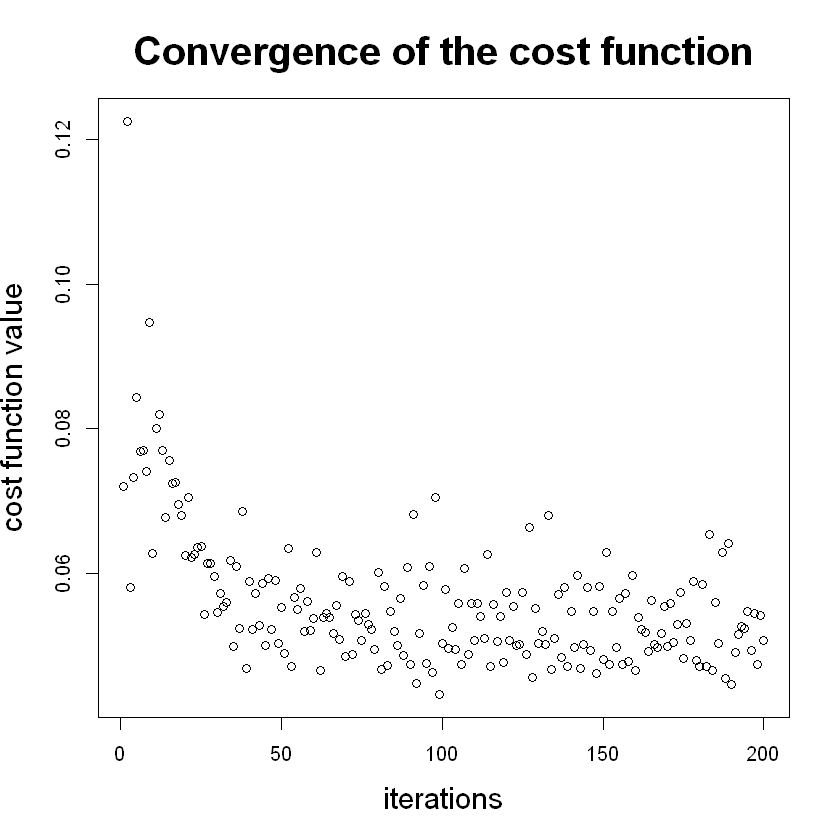

In [101]:
n_low_dim <- 2
learning_rate_alpha <- 1
max_iter <- 200

## starting point for the low dimensional space through spectral embedding
# y <- read.csv("../data/python_y_embedding_n_neigh=15.txt", header=FALSE)
# y <- as.matrix(y)

## random initialization
y_random <- matrix(rnorm(300), ncol=2)
y <- y_random

cost_function_vec <- c()

for (iteration_i in 1:max_iter){
    
    y <- y - learning_rate_alpha * cost_gradient(y, high_dim_edge_avg, a=1.93, b=0.79)

    # plotting
    dir.create(file.path("./plots/UMAP_iris_r"), showWarnings = FALSE)
    png(paste0("./plots/UMAP_iris_r/iris_iter_",iteration_i,".png"), width=500, height=500)
    plot(y[,1], y[,2], pch=19, col=as.numeric(iris_species),
        main=paste("UMAP on Iris data set\niteration = ", iteration_i), xlab="UMAP1", ylab="UMAP2", cex=0.5, cex.main=2)
    legend("bottomleft", legend=levels(iris_species), pch=1, col=1:3)
    dev.off()

    # cost function value
    cost_function_current <- sum(cost_function(y, high_dim_edge_avg)) / 1e+5
    cost_function_vec <- c(cost_function_vec, cost_function_current)

    # algorithm progress
    if (iteration_i %% 10 == 0){
        cat(paste0("Cost function = ", cost_function_current, " after ", iteration_i, " iterations.\n"))
    }
}

plot(cost_function_vec, main="Convergence of the cost function", xlab="iterations", 
    ylab="cost function value", cex.main=2, cex.lab=1.5)
dev.off()

The different iterations are saved in the 'src/plots/UMAP_iris_r' directory. By clicking through the images you can see how the algorithm slowly converges.

After conversion is completed our manually programmed UMAP algorithm shows the following low dimensional representation of our data.

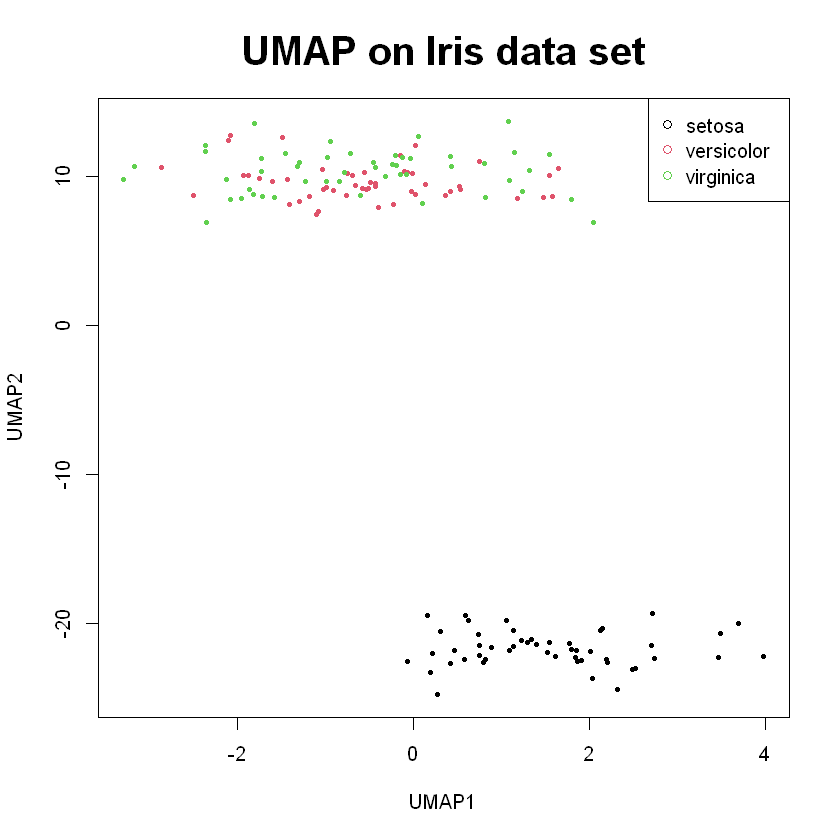

In [102]:
plot(y[,1], y[,2], pch=19, col=factor(iris_species), main="UMAP on Iris data set", 
    xlab="UMAP1", ylab="UMAP2", cex=0.5, cex.main=2)
legend("topright", legend=levels(iris_species), pch=1, col=1:3)    

As already seen in the lecture the manually programmed UMAP algorithm has a hard time distinguishing between the classes 'versicolor' and 'virginica'. You can try and play around with the hyperparamters to achieve a better result for yourself. Try increasing the number of $k$ neighbors to better retain the global structure of the high dimensional space.

## We are finished!